In [1]:
# __Задача 1__
# Даны значения зарплат из выборки выпускников: 
# ```
# 100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 230, 24, 57, 55, 70, 75, 65, 84, 90, 150
# ```
# Используя только встроенные питоновские функции и структуры данных (т.е. без библиотек `numpy`, `pandas` и др.), посчитайте (несмещённое) среднее квадратичное отклонение для данной выборки.
#__Ответ__: 47.34795214

# __Задача 2__
# Найдите число выбросов в выборке из задачи 1. Для определения выбросов используйте методику как при построении "усов" в `boxplot`, однако, как и в задаче 1, пользоваться можно только встроенными функциями и структурами данных.
#__Ответ__: 2

#__Задача 3__
# В университет на факультет A поступило 100 человек, на факультет B - 90 человек и на факультет C - 45 человек. Вероятность того, что студент с факультета A сдаст первую сессию, равна 0.6. Для студента с факультета B эта вероятность равна 0.7, а для студента с факультета C - 0.8. Случайным образом выбирается студент, сдавший первую сессию. Какое событие наиболее вероятно:
# 1. студент учится на факультете A,
# 2. студент учится на факультете B,
# 3. студент учится на факультете C?
#__Ответ__: 2

In [2]:
# __Задача 1__
# Даны значения зарплат из выборки выпускников: 
# ```
# 100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 230, 24, 57, 55, 70, 75, 65, 84, 90, 150
# ```
# Используя только встроенные питоновские функции и структуры данных (т.е. без библиотек `numpy`, `pandas` и др.), посчитайте (несмещённое) среднее квадратичное отклонение для данной выборки.
#__Ответ__: 47.34795214

In [3]:
samples = [100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 230, 24, 57, 55, 70, 75, 65, 84, 90, 150]

In [4]:
def mean(l: list) -> float:
    """Среднее арифметическое
    """
    
    return sum(l) / len(l)

In [5]:
mean(samples)

73.14285714285714

In [6]:
import numpy as np

In [7]:
np.mean(samples)

73.14285714285714

In [8]:
def variance(l: list, unbiased: bool = True) -> float:
    """Выборочная дисперсия
    """
    
    mean_ = mean(l)
    n = len(l)
    l = map(lambda x: (x - mean_) ** 2, l)
    
    return sum(l) / (n - int(unbiased))

In [9]:
variance(samples)

2241.8285714285716

In [10]:
np.var(samples, ddof=1)

2241.828571428571

In [11]:
def std(l: list, unbiased: bool = True) -> float:
    """Выборочное среднее квадратическое отклонение
    """
    
    return variance(l, unbiased) ** 0.5

In [12]:
std(samples)

47.34795213553139

In [13]:
np.std(samples, ddof=1)

47.347952135531386

In [14]:
# __Задача 2__
# Найдите число выбросов в выборке из задачи 1. Для определения выбросов используйте методику как при построении "усов" в `boxplot`, однако, как и в задаче 1, пользоваться можно только встроенными функциями и структурами данных.
#__Ответ__: 2

In [15]:
def quantile(l: list, order: float) -> float:
    """Квантиль порядка `order` по списку `l`
    """
    
    l = sorted(l)
    n = len(l)
    
    n_left_elements = int(n * order)
    n_right_elements = int(n * (1 - order))
    
    print(n, n_left_elements, n_right_elements)
    
    if n_left_elements + n_right_elements == n:
        return (l[n_left_elements - 1] + l[n_left_elements]) / 2
    
    else:
        assert n_left_elements + n_right_elements == n - 1
        
        return l[n_left_elements]
    
    
def median(l: list) -> float:
    """Медиана выборки
    """
    
    return quantile(l, 0.5)

In [16]:
median(samples)

21 10 10


70

In [17]:
np.median(samples)

70.0

In [18]:
q1 = quantile(samples, 0.25)
q1

21 5 15


45

In [19]:
np.quantile(samples, 0.25)

45.0

In [20]:
q3 = quantile(samples, 0.75)
q3

21 15 5


84

In [21]:
np.quantile(samples, 0.75)

84.0

In [22]:
iqd = q3 - q1
iqd

39

In [23]:
boxplot_range = (q1 - 1.5 * iqd, q3 + 1.5 * iqd)
boxplot_range

(-13.5, 142.5)

In [24]:
outliers = list(filter(lambda x: not (boxplot_range[0] <= x <= boxplot_range[1]), samples))
outliers

[230, 150]

In [25]:
import seaborn as sns

%config InlineBackend.figure_formats = ['svg']

<AxesSubplot:>

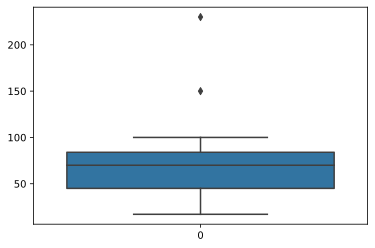

In [26]:
sns.boxplot(data=samples)

In [27]:
#__Задача 3__
# В университет на факультет A поступило 100 человек, на факультет B - 90 человек и на факультет C - 45 человек. Вероятность того, что студент с факультета A сдаст первую сессию, равна 0.6. Для студента с факультета B эта вероятность равна 0.7, а для студента с факультета C - 0.8. Случайным образом выбирается студент, сдавший первую сессию. Какое событие наиболее вероятно:
# 1. студент учится на факультете A,
# 2. студент учится на факультете B,
# 3. студент учится на факультете C?
#__Ответ__: 2

In [28]:
# Пусть  A ,  B ,  C  — события, заключающиеся в том, что случайным образом взятый студент учится, соответственно, на факультете  A ,  B  или  C . Кроме того, пусть событие  S  обозначает, что случайным образом взятый студент сдал первую сессию. Для решения задачи нам нужно посчитать условные вероятности
# P(A|S),P(B|S),P(C|S) 
# и выбрать тот факультет, которому соответствует наибольшая вероятность. Данные вероятности можно посчитать с помощью формулы Байеса. Например, для факультета  A :
# P(A|S)=P(S|A)⋅P(A)P(S) 

# Сперва оценим вероятности  P(A) ,  P(B) ,  P(C) . Поскольку мы знаем, сколько на каждом факультете студентов, мы можем оценить вероятности этих событий. (Заметим, что всего студентов 235.)
# P(A)=100235=0.4255,P(B)=90235=0.383,P(C)=45235=0.1915

In [29]:
a = 100
b = 90
c = 45

p_a = a / (a + b + c)
p_b = b / (a + b + c)
p_c = c / (a + b + c)

p_a, p_b, p_c

(0.425531914893617, 0.3829787234042553, 0.19148936170212766)

In [30]:
# Далее, по условию задачи нам даны вероятности:
# P(S|A)=0.6,P(S|B)=0.7,P(S|C)=0.8

In [31]:
p_sa = 0.5
p_sb = 0.6
p_sc = 0.7

In [ ]:
# Для того, чтобы посчитать вероятность  P(S) , нам понадобится формула полной вероятности. Имеем:
# P(S)=P(S|A)⋅P(A)+P(S|B)⋅P(B)+P(S|C)⋅P(C)=0.5766

In [32]:
p_s = p_sa * p_a + p_sb * p_b + p_sc * p_c
p_s

0.5765957446808511

In [33]:
p_as = p_sa * p_a / p_s
p_bs = p_sb * p_b / p_s
p_cs = p_sc * p_c / p_s

p_as, p_bs, p_cs

(0.36900369003690037, 0.3985239852398524, 0.23247232472324722)

In [ ]:
# Наиболее вероятно, что данный студент учится на факультете  B